## Importing Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Function to Compute Disparity Map

This function computes the disparity map between a pair of stereo images:

### Parameters:
- **left_image**: The left stereo image.
- **right_image**: The right stereo image.
- **window_size**: The size of the window used for matching.
- **cost_function**: The method used to compute the cost ('SAD' or 'SSD').
- **max_disparity**: The maximum disparity to consider.

### Returns:
A disparity map representing the differences in pixel positions between the two images.

In [ ]:
def compute_disparity(left_image, right_image, window_size, cost_function, max_disparity):
    h, w = left_image.shape
    disparity_map = np.zeros_like(left_image, dtype=np.float32)
    half_window = window_size // 2
    for y in range(half_window, h - half_window):
        for x in range(half_window, w - half_window):     
            min_cost = float('inf')
            best_disparity = 0
            #search for the best matching pixel in the right image in the same y and all row and within the disparity range
            #range is limited by max_disparity and the image boundaries
            for r in range(max(half_window, x - max_disparity), min(w - half_window, x + max_disparity)):
                cost = 0
                
                # Iterate over window to calculate cost 
                for u in range(-half_window, half_window + 1):
                    for v in range(-half_window, half_window + 1):
                        #get pixel values from left and right images
                        left_pixel = left_image[y + u, x + v]
                        right_pixel = right_image[y + u, r + v]
                        
                        #calculate cost for specific cost function
                        if cost_function == 'SAD':                          
                            cost += abs(int(left_pixel) - int(right_pixel)) #sum of absolute differences
                        elif cost_function == 'SSD':
                            cost += (int(left_pixel) - int(right_pixel)) ** 2 #sum of squared differences
                
                if cost < min_cost:
                    min_cost = cost
                    best_disparity = abs(x - r)
            disparity_map[y, x] = best_disparity

    return disparity_map

In [2]:
def compute_disparity(left_image, right_image, window_size, cost_function, max_disparity):
    h, w = left_image.shape

    #initialize disparity map with zeros with the same shape of left image
    disparity_map = np.zeros_like(left_image, dtype=np.float32)

    half_window = window_size // 2

    #loops for each pixel in the left image avoiding the borders TO FIT THE WINDOW SIZE
    for y in range(half_window, h - half_window):
        for x in range(half_window, w - half_window):
            #initialize min cost = infinity & best disparity = 0
            min_cost = float('inf')
            best_disparity = 0
            
            #search for the best matching pixel in the right image in the same y and all row and within the disparity range
            #range is limited by max_disparity and the image boundaries
            for r in range(max(half_window, x - max_disparity), min(w - half_window, x + max_disparity)):
                # Initialize cost for the current disparity
                cost = 0
                
                # Iterate over window to calculate cost 
                for u in range(-half_window, half_window + 1):
                    for v in range(-half_window, half_window + 1):
                        #get pixel values from left and right images
                        left_pixel = left_image[y + u, x + v]
                        right_pixel = right_image[y + u, r + v]
                        
                        #calculate cost for specific cost function
                        if cost_function == 'SAD':                          
                            cost += abs(int(left_pixel) - int(right_pixel)) #sum of absolute differences
                        elif cost_function == 'SSD':
                            cost += (int(left_pixel) - int(right_pixel)) ** 2 #sum of squared differences
                
                #check current cost < min cost for update
                if cost < min_cost:
                    #update min cost & best disparity
                    min_cost = cost
                    best_disparity = abs(x - r)

            #store best disparity for current pixel 
            disparity_map[y, x] = best_disparity


    return disparity_map

## Function to Compute and Plot Disparities

### Functionality:
It computes the disparity maps for each combination of window size and cost function, normalizes them for visualization, and plots the results.

In [3]:
def compute_and_plot_disparities(left_image, right_image, window_sizes, cost_functions, max_disparity):
    results = []

    for window_size in window_sizes:
        for cost_function in cost_functions:
            # Compute disparity map
            disparity_map = compute_disparity(left_image, right_image, window_size, cost_function, max_disparity)
            # Normalize for visualization
            disparity_map_normalized =cv2.normalize(disparity_map, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
            results.append((window_size, cost_function, disparity_map_normalized))

    # Plot the results
    plt.figure(figsize=(15, 10))
    for i, (window_size, cost_function, disparity_map) in enumerate(results):
        plt.subplot(len(window_sizes), len(cost_functions), i + 1)
        plt.title(f"Disparity Map (w={window_size}, {cost_function})")
        plt.imshow(disparity_map, cmap='gray')
        plt.colorbar(label="Disparity")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Parameters for Disparity Computation

In [4]:
# Parameters
window_sizes = [1, 5, 9]  # Window sizes
cost_functions = ["SAD", "SSD"]  # Cost functions
max_disparity = 64  # Maximum disparity

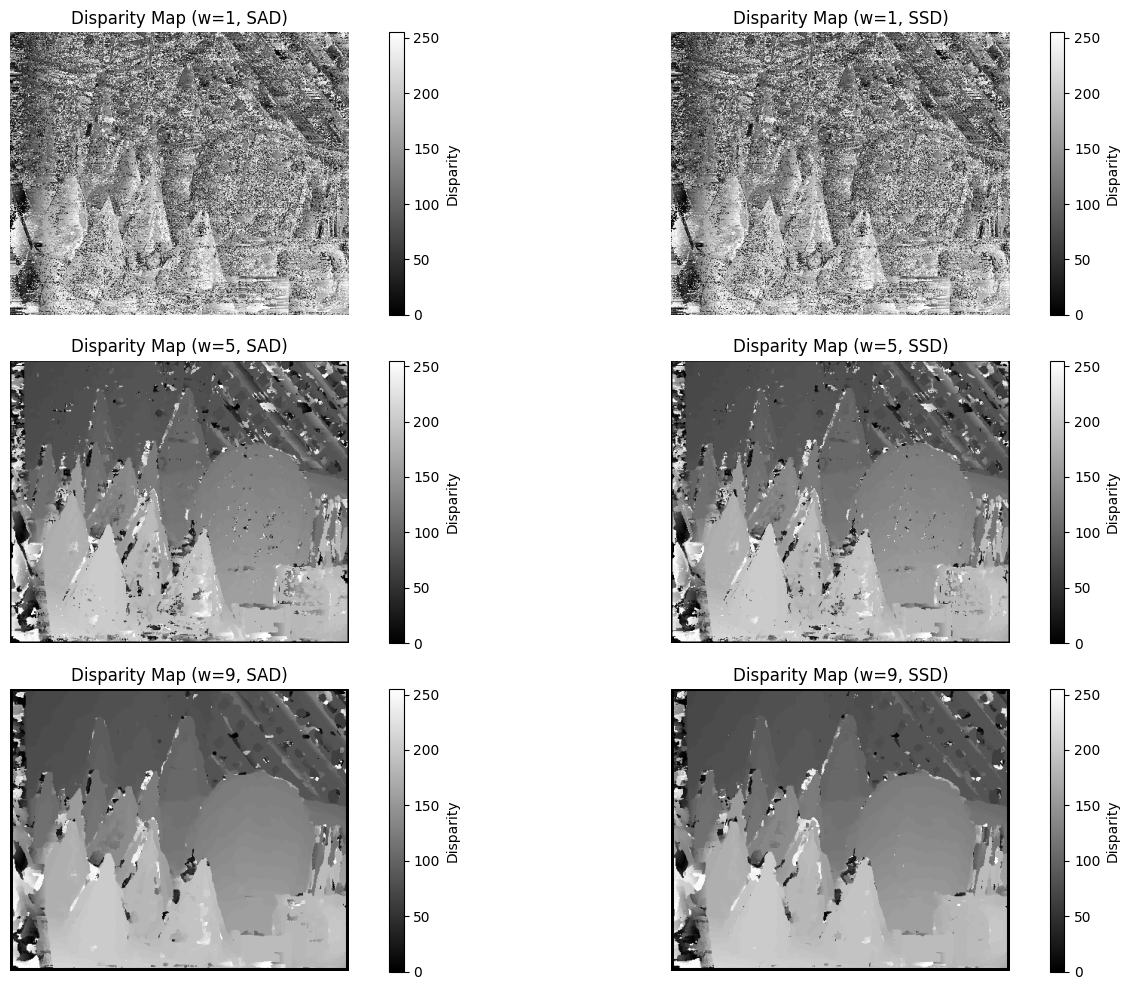

In [5]:

# Load left and right images (update paths as needed)
left_image1 = cv2.imread(r'.\stereo_materials\l2.png', cv2.IMREAD_GRAYSCALE)
right_image1 = cv2.imread(r'.\stereo_materials\r2.png', cv2.IMREAD_GRAYSCALE)

# Call function for the first pair of images
compute_and_plot_disparities(left_image1, right_image1, window_sizes, cost_functions, max_disparity)


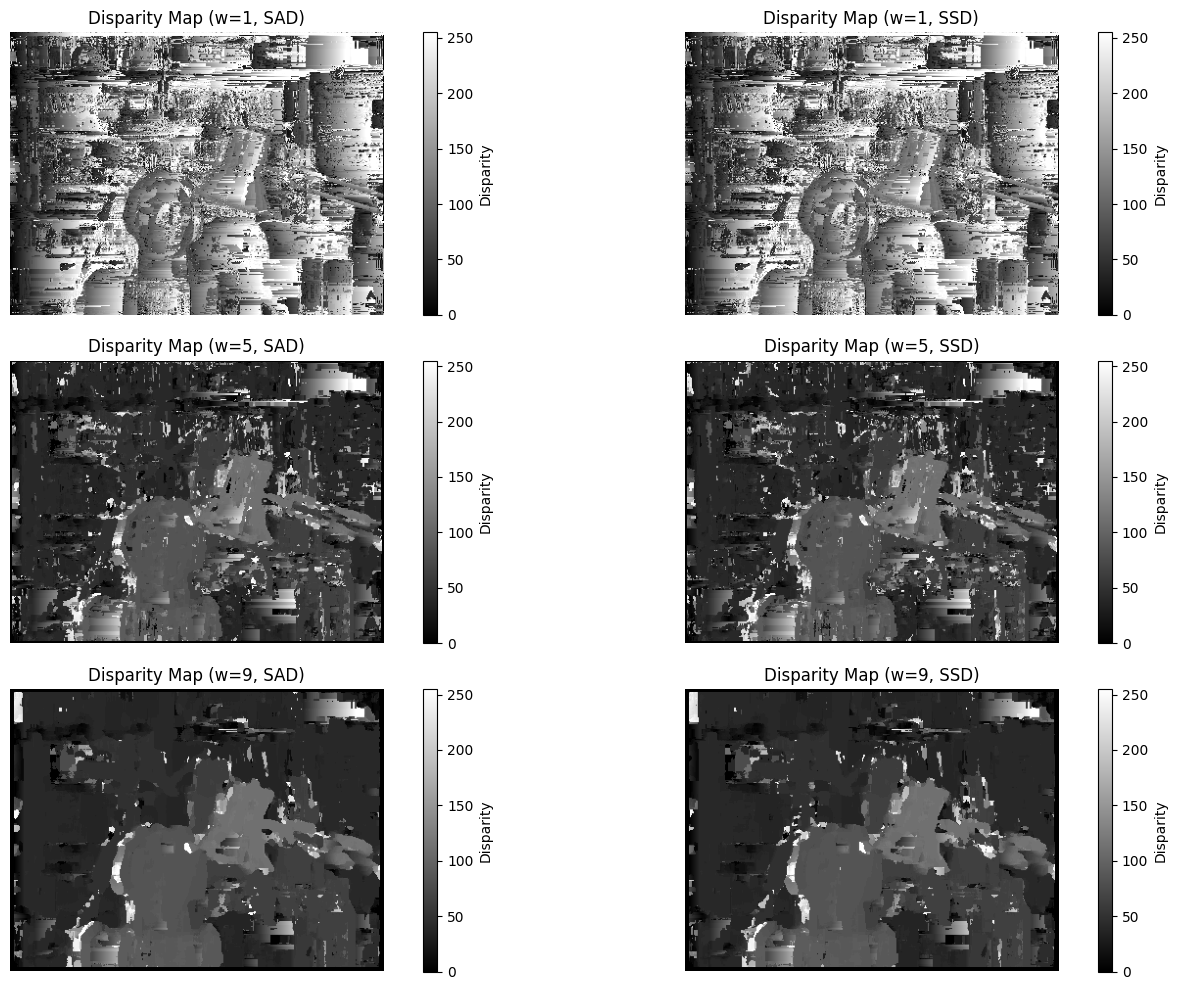

In [6]:
# Load left and right images (update paths as needed)
left_image2 = cv2.imread(r'.\stereo_materials\l1.png', cv2.IMREAD_GRAYSCALE)
right_image2 = cv2.imread(r'.\stereo_materials\r1.png', cv2.IMREAD_GRAYSCALE)

# Call function for the first pair of images
compute_and_plot_disparities(left_image2, right_image2, window_sizes, cost_functions, max_disparity)

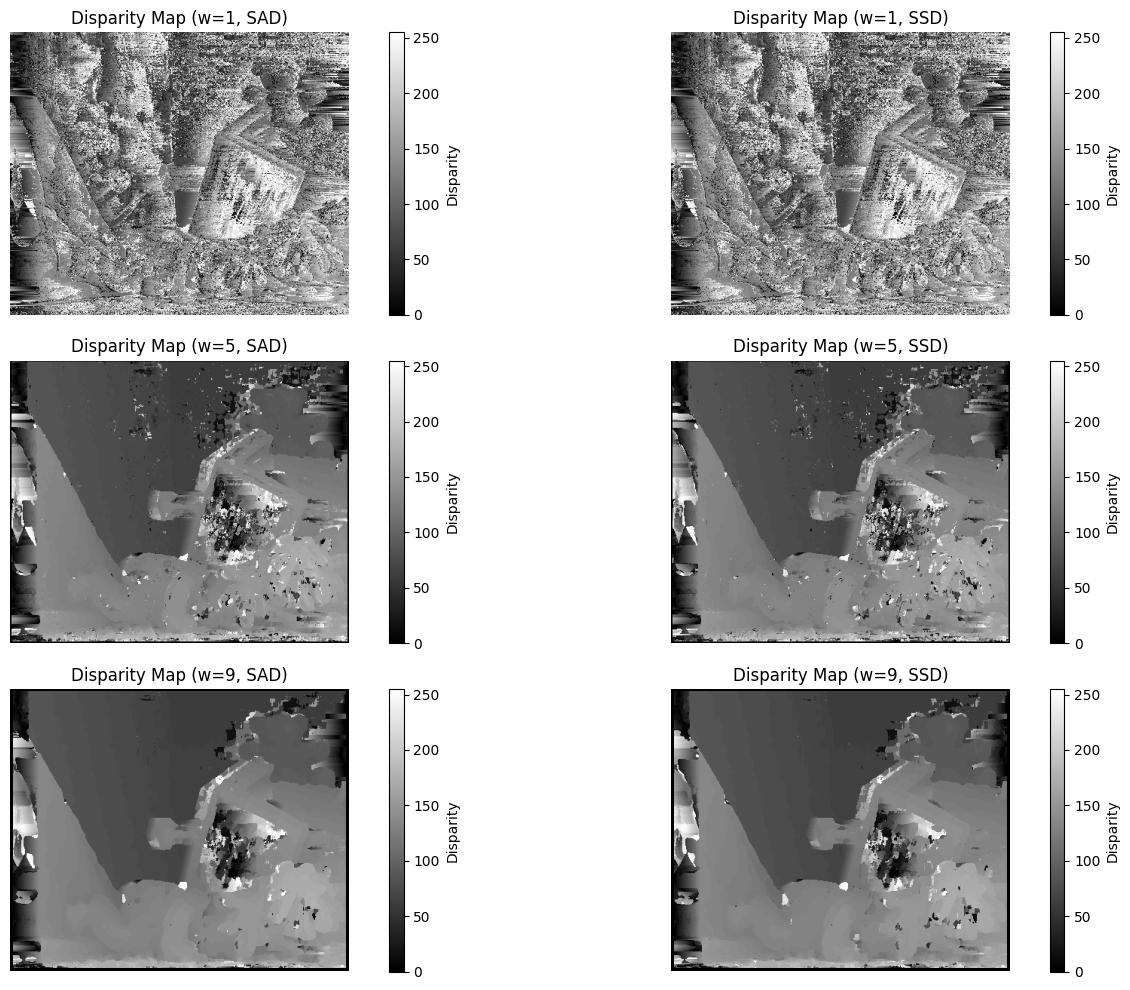

In [7]:
# Load left and right images (update paths as needed)
left_image3 = cv2.imread(r'.\stereo_materials\l3.png', cv2.IMREAD_GRAYSCALE)
right_image3 = cv2.imread(r'.\stereo_materials\r3.png', cv2.IMREAD_GRAYSCALE)

# Call function for the first pair of images
compute_and_plot_disparities(left_image3, right_image3, window_sizes, cost_functions, max_disparity)

# 1.1.2 Dynamic Programming

In [ ]:
def compute_disparity_line(Il, Ir, sigma=2, c0=1):
	
	N = len(Il)
	M = len(Ir)
    # we store cumulative cost for aligning pixels between the two rows in D
	D = np.zeros((N, M))  
    # disparity is an array that will hold the final disparity values for each pixel in the left row
	disparity = np.zeros(N)
    # Here we calculates the squared difference between two pixel values divide over the weight of the squared difference cost between pixels
    # Larger intensity differences result in higher matching costs.
	dij = lambda Il_val, Ir_val: ((Il_val - Ir_val) ** 2) / (sigma ** 2)

	# Initialize the top left corner of matrix D with matching cost of Il[0] and Ir[0]
	D[0, 0] = dij(Il[0], Ir[0])

	# Initialize a starting "boundary" condition 
    
    # Moving vertically by adding penalty c0 (this mean skip pixel in left image)
	for i in range(1, N):
		D[i, 0] = D[i-1, 0] + c0
   # Moving horizontally by adding penalty c0 (this mean skip pixel in right image)
	for j in range(1, M):
		D[0, j] = D[0, j-1] + c0

	# Fill the cost matrix
	for i in range(1, N):
		for j in range(1, M):
			match_cost = D[i-1, j-1] + dij(Il[i], Ir[j]) #Align pixel i in the left row with pixel j in the right row.
			skip_left_cost = D[i-1, j] + c0 #Skip a pixel in the left row
			skip_right_cost = D[i, j-1] + c0 #Skip a pixel in the right row
			D[i, j] = min(match_cost, skip_left_cost, skip_ right_cost) # choose the min cost between the 3 past choices

	# Backtracking to compute disparity
	i, j = N-1, M-1
	while i > 0 and j > 0:
        # first case that the value of D came from match cost so  disparity will be |i - j|
		if D[i, j] == D[i-1, j-1] + dij(Il[i], Ir[j]):
			disparity[i] = abs(i - j)
			i, j = i-1, j-1
        # Second case skip a pixel in the left row so disparity will be zero
		elif D[i, j] == D[i-1, j] + c0:
			disparity[i] = 0
			i -= 1
        # Third case skip a pixel in the right row so disparity will be zero
		else:
			j -= 1

	# Handle remaining unvisited pixels
	while i > 0:
		disparity[i] = 0
		i -= 1

	return disparity

In [ ]:
def compute_disparity_map(left_image, right_image):
    
    # Ensure that the left and right images have the same height
    assert left_image.shape[0] == right_image.shape[0], "Images must have the same height"
    
    height, width = left_image.shape
    # Disparity map for the left image to store the disparity values for the entire image
    disparity_map = np.zeros((height, width))  

    # we will loop over each row and call compute_disparity_line to compute disparity for this row and store it in corresponding row of the disparity map
    for row in range(height):
        disparity_map[row, :] = compute_disparity_line(left_image[row, :], right_image[row, :])

    return disparity_map


 Compute Disparity map for Image 1

In [ ]:
left_image_path_1=r'.\stereo_materials\l1.png'
right_image_path_1=r'.\stereo_materials\r1.png'

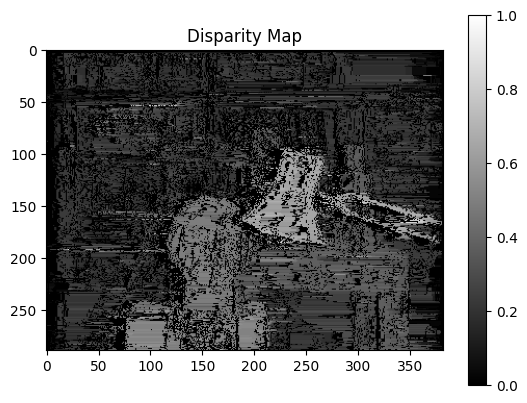

In [ ]:
# Load grayscale images
left_image_1 = cv2.imread(left_image_path_1, cv2.IMREAD_GRAYSCALE)
right_image_1 = cv2.imread(right_image_path_1, cv2.IMREAD_GRAYSCALE)
left_image_1 = left_image_1.astype(np.float32)
right_image_1 = right_image_1.astype(np.float32)



# Ensure both images are the same size
assert left_image_1.shape == right_image_1.shape, "Left and right images must have the same dimensions"

# Compute disparity map
disparity_map = compute_disparity_map(left_image_1, right_image_1)

# Normalize the disparity map for visualization
normalized_disparity = (disparity_map - np.min(disparity_map)) / (np.max(disparity_map) - np.min(disparity_map))

# Display the disparity map
plt.imshow(normalized_disparity, cmap='gray')
plt.title("Disparity Map")
plt.colorbar()
plt.show()


 Compute Disparity map for Image 2

In [ ]:
left_image_path_2=r'.\stereo_materials\l2.png'
right_image_path_2=r'.\stereo_materials\r2.png'

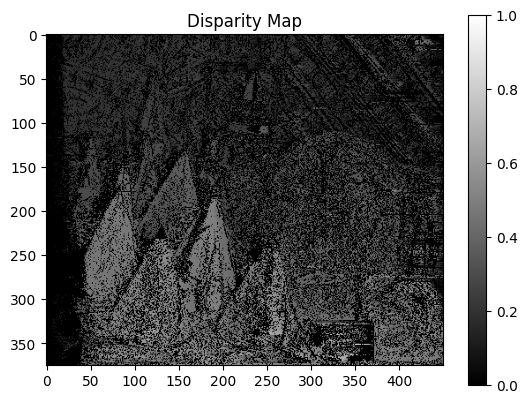

In [ ]:
# Load grayscale images
left_image_2 = cv2.imread(left_image_path_2, cv2.IMREAD_GRAYSCALE)
right_image_2 = cv2.imread(right_image_path_2, cv2.IMREAD_GRAYSCALE)
left_image_2 = left_image_2.astype(np.float32)
right_image_2 = right_image_2.astype(np.float32)

# Ensure both images are the same size
assert left_image_2.shape == right_image_2.shape, "Left and right images must have the same dimensions"

# Compute disparity map
disparity_map = compute_disparity_map(left_image_2, right_image_2)

# Normalize the disparity map for visualization
normalized_disparity = (disparity_map - np.min(disparity_map)) / (np.max(disparity_map) - np.min(disparity_map))

# Display the disparity map
plt.imshow(normalized_disparity, cmap='gray')
plt.title("Disparity Map")
plt.colorbar()
plt.show()

 Compute Disparity map for Image 3

In [ ]:
left_image_path_3=r'.\stereo_materials\l3.png'
right_image_path_3=r'.\stereo_materials\r3.png'

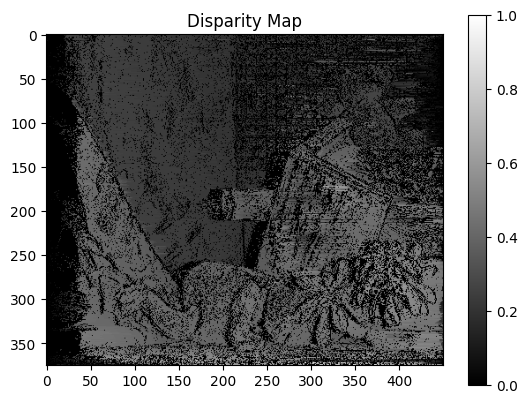

In [ ]:
# Load grayscale images
left_image_3 = cv2.imread(left_image_path_3, cv2.IMREAD_GRAYSCALE)
right_image_3 = cv2.imread(right_image_path_3, cv2.IMREAD_GRAYSCALE)
left_image_3 = left_image_3.astype(np.float32)
right_image_3 = right_image_3.astype(np.float32)


# Ensure both images are the same size
assert left_image_3.shape == right_image_3.shape, "Left and right images must have the same dimensions"

# Compute disparity map
disparity_map = compute_disparity_map(left_image_3, right_image_3)

# Normalize the disparity map for visualization
normalized_disparity = (disparity_map - np.min(disparity_map)) / (np.max(disparity_map) - np.min(disparity_map))

# Display the disparity map
plt.imshow(normalized_disparity, cmap='gray')
plt.title("Disparity Map")
plt.colorbar()
plt.show()

# 1.2 Bonus

In [ ]:
def compute_disparity_line_2(Il, Ir, sigma, c0):
    # Compute disparity for a single scanline and visualize alignment.
    N = len(Il)
    M = len(Ir)
    D = np.zeros((N, M))  # Cost matrix
    disparity = np.zeros(N)
    path = []  # To store the alignment path
    dij = lambda Il_val, Ir_val: ((Il_val - Ir_val) ** 2) / sigma ** 2

    # Initialize D(1,1)
    D[0, 0] = dij(Il[0], Ir[0])

    # Initialize the first row and column
    for i in range(1, N):
        D[i, 0] = D[i-1, 0] + c0
    for j in range(1, M):
        D[0, j] = D[0, j-1] + c0

    # Fill the cost matrix
    for i in range(1, N):
        for j in range(1, M):
            match_cost = D[i-1, j-1] + dij(Il[i], Ir[j])
            skip_left_cost = D[i-1, j] + c0
            skip_right_cost = D[i, j-1] + c0
            D[i, j] = min(match_cost, skip_left_cost, skip_right_cost)

    # Backtracking to compute disparity
    i, j = N-1, M-1
    while i > 0 and j > 0:
        path.append((i, j)) # Append matched indecies 
        if D[i, j] == D[i-1, j-1] + dij(Il[i], Ir[j]):
            disparity[i] = abs(i - j)
            i, j = i-1, j-1
        elif D[i, j] == D[i-1, j] + c0:
            disparity[i] = 0
            i -= 1
        else:
            j -= 1

    # Handle remaining unvisited pixels
    while i > 0:
        path.append((i, 0)) # Append horizontal indecies
        disparity[i] = 0
        i -= 1

    while j > 0:
        path.append((0, j)) # Append vertical indecies
        j -= 1

    path.append((0, 0))  # Include the start point (1,1 in 1-based index)
    return disparity, path


In [ ]:
def plot_alignment(path, image_no):
    # Plot the alignment of two scanlines.
    Il_indices, Ir_indices = zip(*path)

    plt.figure(figsize=(10, 8))
    plt.plot(Ir_indices, Il_indices, '-o', markersize=2, label='Alignment Path')
    plt.title(f'Alignment Plot (Il vs Ir) of Image {image_no}')
    plt.xlabel('Ir (Horizontal)')
    plt.ylabel('Il (Vertical)')
    plt.gca().invert_yaxis()  # Flip to match matrix indexing
    plt.legend()
    plt.grid()
    plt.show()

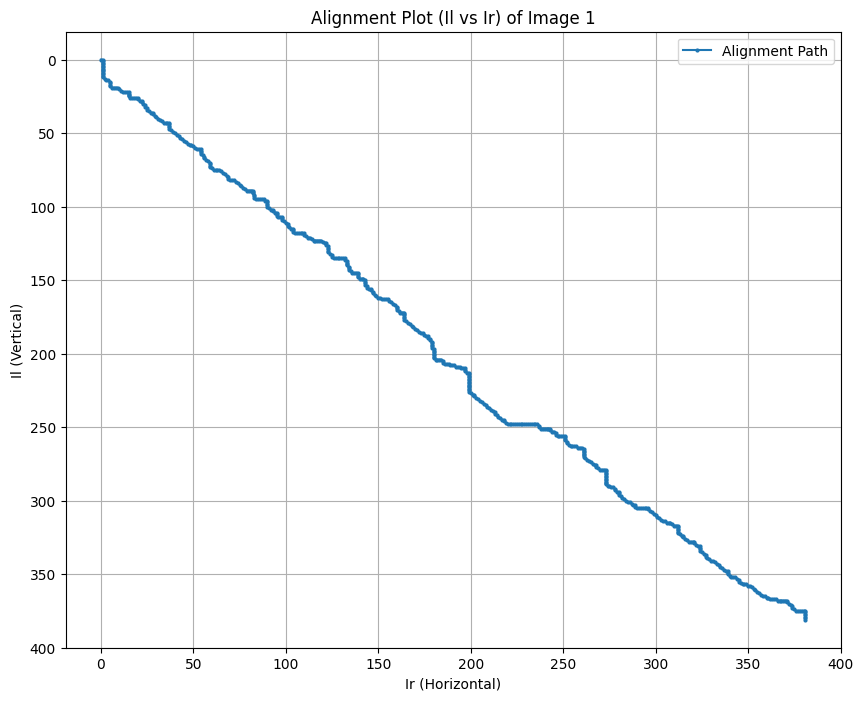

In [ ]:
Il = left_image_1[100, :]  # Select a scanline from the left image
Ir = right_image_1[100, :]  # Select the corresponding scanline from the right image

# Compute disparity and alignment path
disparity, path = compute_disparity_line_2(Il, Ir, sigma=2, c0=1)

# Plot alignment
plot_alignment(path, 1)


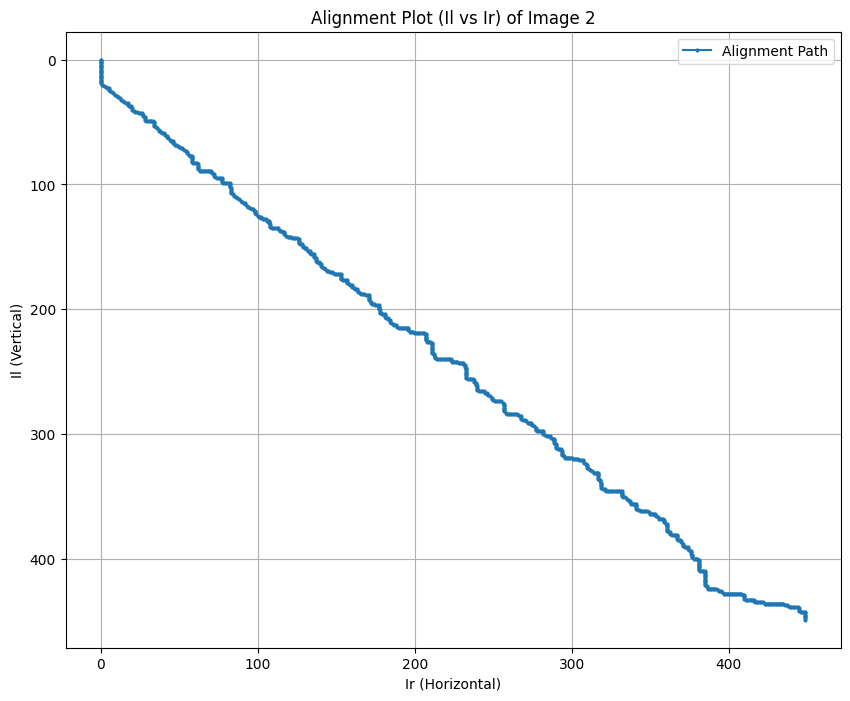

In [ ]:
Il = left_image_2[100, :]  # Select a scanline from the left image
Ir = right_image_2[100, :]  # Select the corresponding scanline from the right image

# Compute disparity and alignment path
disparity, path = compute_disparity_line_2(Il, Ir, sigma=2, c0=1)

# Plot alignment
plot_alignment(path, 2)


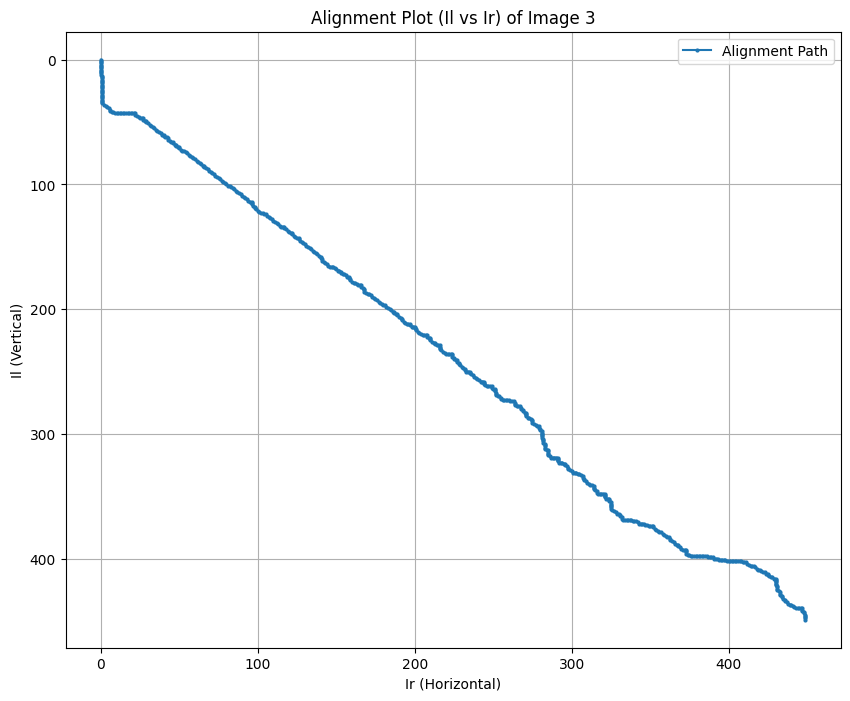

In [ ]:
Il = left_image_3[100, :]  # Select a scanline from the left image
Ir = right_image_3[100, :]  # Select the corresponding scanline from the right image

# Compute disparity and alignment path
disparity, path = compute_disparity_line_2(Il, Ir, sigma=2, c0=1)

# Plot alignment
plot_alignment(path, 3)
